In [ ]:
from pathlib import Path
from datetime import datetime as dt
import pandas as pd


In [ ]:
path="ANERCorp.xlsx"


In [ ]:
xlsx = pd.ExcelFile(path)

In [ ]:
df=pd.read_excel(xlsx, header=None)

In [ ]:
df

In [ ]:
df = df[[0,1]]

In [ ]:
df = df.rename(columns={0: 'text', 1: 'label'})

In [ ]:
df

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.2)
train_arr = []
test_arr = []
train_lbl = []
test_lbl = []

In [ ]:
train_arr=train['text'].astype(str)
train_lbl=train['label'].astype(str)
test_arr=test['text'].astype(str)
test_lbl=test['label'].astype(str)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer,TfidfVectorizer

In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(train_arr)
train_mat = vectorizer.transform(train_arr)

In [ ]:
tfidf = TfidfTransformer()
tfidf.fit(train_mat)
train_tfmat = tfidf.transform(train_mat)


In [ ]:
test_mat = vectorizer.transform(test_arr)
test_tfmat = tfidf.transform(test_mat)


In [ ]:
del df
del test_arr
del train_arr

In [ ]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB

In [ ]:
train_tfmat

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
lsvm=LinearSVC()
lsvm.fit(train_tfmat,train_lbl)


In [ ]:
y_pred_lsvm=lsvm.predict(test_tfmat)

In [ ]:
test=['ألمانيا']
test_str = vectorizer.transform(test)
test_tfstr = tfidf.transform(test_str)
test_tfstr.shape
lsvm.predict(test_tfstr.toarray())[0]

In [ ]:
from sklearn.metrics import  accuracy_score
from sklearn import metrics

In [ ]:
print("accuracy:", metrics.accuracy_score(test_lbl, y_pred_lsvm))

In [ ]:
phrase="شاهد أحمد مباراة فرنسا"
arr=phrase.split()

In [ ]:
arr

In [ ]:
import sys
y=[]
token=[]
for x in arr:
    x=[x]
    test_str = vectorizer.transform(x)
    test_tfstr = tfidf.transform(test_str)
    test_tfstr.shape
    token.append(x)
    y.append(lsvm.predict(test_tfstr.toarray())[0])

In [ ]:
df=pd.DataFrame(list(zip(token,y)),columns=['token','entity_type'])

In [ ]:
df

In [4]:
from pathlib import Path
from datetime import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [5]:
# Load the dataset
path = "ANERCorp.xlsx"
df = pd.read_excel(path, header=None)
df = df.drop(2, axis=1)
df = df.rename(columns={0: 'text', 1: 'label'})


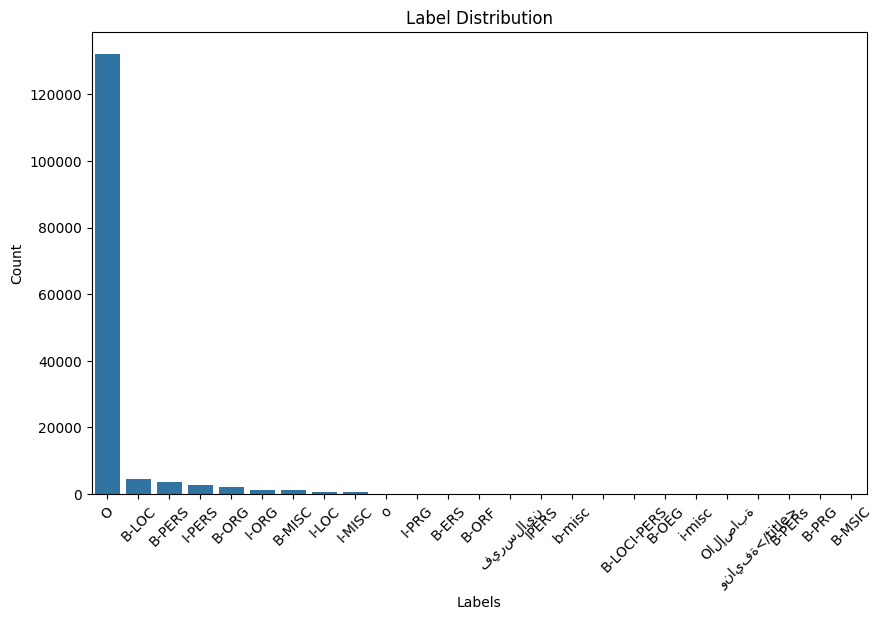

In [6]:
# Data distribution visualization
label_counts = df['label'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title("Label Distribution")
plt.xlabel("Labels")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [7]:

# Split data into training and testing sets
train, test = train_test_split(df, test_size=0.2, random_state=42)
train_arr = train['text'].astype(str)
train_lbl = train['label'].astype(str)
test_arr = test['text'].astype(str)
test_lbl = test['label'].astype(str)


In [8]:
# Vectorize the text
vectorizer = CountVectorizer()
vectorizer.fit(train_arr)
train_mat = vectorizer.transform(train_arr)
test_mat = vectorizer.transform(test_arr)


In [9]:
# Apply TF-IDF transformation
tfidf = TfidfTransformer()
tfidf.fit(train_mat)
train_tfmat = tfidf.transform(train_mat)
test_tfmat = tfidf.transform(test_mat)

In [10]:
# Train a Linear SVC model
lsvm = LinearSVC(random_state=42)
lsvm.fit(train_tfmat, train_lbl)

LinearSVC(random_state=42)

In [11]:
# Predict on test set
y_pred_lsvm = lsvm.predict(test_tfmat)

In [12]:
# Calculate accuracy
accuracy = accuracy_score(test_lbl, y_pred_lsvm)
print("Accuracy:", accuracy)


Accuracy: 0.9389180916894005


Accuracy: 0.9389


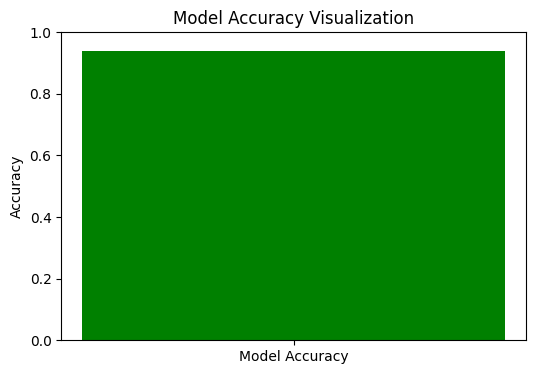

In [13]:
# Accuracy Visualization
accuracy = accuracy_score(test_lbl, y_pred_lsvm)
print(f"Accuracy: {accuracy:.4f}")

# Visualize Accuracy
plt.figure(figsize=(6, 4))
plt.bar(['Model Accuracy'], [accuracy], color='green')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Visualization')
plt.ylim(0, 1)
plt.show()

In [14]:
# Classification report
print("\nClassification Report:")
print(classification_report(test_lbl, y_pred_lsvm))


Classification Report:


C:\Users\EL.DAWLIA\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

       B-ERS       0.00      0.00      0.00         1
       B-LOC       0.92      0.81      0.86       906
 B-LOCI-PERS       0.00      0.00      0.00         1
      B-MISC       0.83      0.56      0.67       234
       B-ORG       0.77      0.67      0.72       403
      B-PERS       0.71      0.62      0.66       732
      B-PERs       0.00      0.00      0.00         1
       I-LOC       0.78      0.37      0.50       116
      I-MISC       0.51      0.18      0.27       103
       I-ORG       0.62      0.48      0.54       281
      I-PERS       0.63      0.32      0.43       554
       IPERS       0.00      0.00      0.00         1
           O       0.95      0.99      0.97     26414
         nan       0.00      0.00      0.00       310
           o       0.00      0.00      0.00         1

    accuracy                           0.94     30058
   macro avg       0.45      0.33      0.38     30058
weighted avg       0.92   

C:\Users\EL.DAWLIA\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\EL.DAWLIA\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


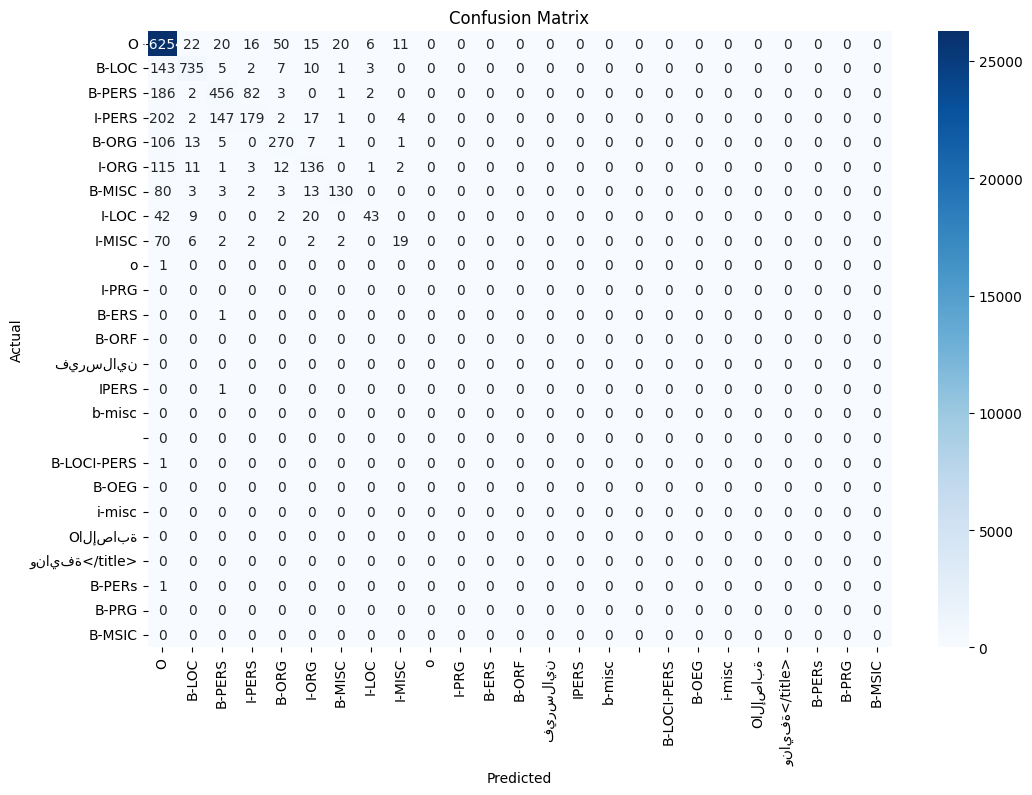

In [15]:
# Confusion matrix visualization
conf_matrix = confusion_matrix(test_lbl, y_pred_lsvm, labels=label_counts.index)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=label_counts.index, yticklabels=label_counts.index, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [16]:
# Save the model and transformers
joblib.dump(lsvm, "arabic_ner_model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")
joblib.dump(tfidf, "tfidf.pkl")


['tfidf.pkl']

In [17]:
# Predict on a custom phrase
phrase = "شاهد أحمد مباراة فرنسا"
tokens = phrase.split()
predictions = []

for token in tokens:
    test_vec = vectorizer.transform([token])
    test_tfvec = tfidf.transform(test_vec)
    pred_label = lsvm.predict(test_tfvec)[0]
    predictions.append((token, pred_label))


In [18]:
# Display predictions
result_df = pd.DataFrame(predictions, columns=['Token', 'Entity'])
print("\nPredictions on custom input:")
print(result_df)



Predictions on custom input:
    Token  Entity
0    شاهد       O
1    أحمد  B-PERS
2  مباراة       O
3   فرنسا   B-LOC


In [19]:

# Save predictions
result_df.to_csv("predictions.csv", index=False)


In [20]:

# Load the model for external testing
def predict_external_input(text):
    model = joblib.load("arabic_ner_model.pkl")
    vectorizer = joblib.load("vectorizer.pkl")
    tfidf = joblib.load("tfidf.pkl")

    tokens = text.split()
    predictions = []

    for token in tokens:
        test_vec = vectorizer.transform([token])
        test_tfvec = tfidf.transform(test_vec)
        pred_label = model.predict(test_tfvec)[0]
        predictions.append((token, pred_label))

    return pd.DataFrame(predictions, columns=['Token', 'Entity'])


In [21]:

# Example of testing the saved model
external_input = "يوسف سافر الي مصر ليشاهد الأهرامات في الجيزة ومعه سامي "
predicted_df = predict_external_input(external_input)
print("\nExternal input predictions:")
print(predicted_df)



External input predictions:
       Token  Entity
0       يوسف  B-PERS
1       سافر       O
2        الي       O
3        مصر   B-LOC
4     ليشاهد       O
5  الأهرامات       O
6         في       O
7     الجيزة   B-LOC
8       ومعه       O
9       سامي  B-PERS
